Univariate

Bar chart

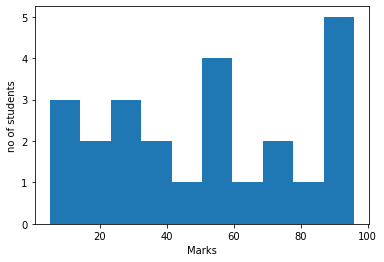

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,1) 
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27,63,71,90,92,95,96,32,37,40]) 
plt.hist(a) 
ax.set_xlabel("Marks") 
ax.set_ylabel('no of students') 
plt.show()

Bi-Variate

Scatter plot

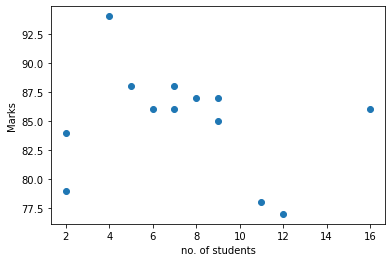

In [ ]:
import matplotlib.pyplot as plt
no_of_students=[5,7,8,7,2,16,2,9,4,11,12,9,6] 
marks=[88,86,87,88,79,86,84,87,94,78,77,85,86]
plt.scatter(no_of_students,marks)
plt.xlabel("no. of students")
plt.ylabel("Marks")
plt.show()

descriptive statistics



In [ ]:
import pandas as pd
import numpy as np
#Create a DataFrame
df = pd.DataFrame()

Handle the missing values

In [3]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('Churn_Modelling.csv', header=None)
# summarize the dataset
print(dataset.describe())

               0           1      2      3       4      5      6      7   \
count       10001       10001  10001  10001   10001  10001  10001  10001   
unique      10001       10001   2933    461       4      3     71     12   
top     RowNumber  CustomerId  Smith    850  France   Male     37      2   
freq            1           1     32    233    5014   5457    478   1048   

           8      9      10     11        12     13  
count   10001  10001  10001  10001     10001  10001  
unique   6383      5      3      3     10000      3  
top         0      1      1      1  24924.92      0  
freq     3617   5084   7055   5151         2   7963  


Find Outliers

In [4]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
 
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Removing Outliers

In [7]:
# Importing
import  sklearn
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd

# Load the dataset
bos_hou = load_boston()

# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

''' Detection '''
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(df_boston['DIS'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df_boston.shape)

# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape: ", df_boston.shape)


Old Shape:  (506, 13)
New Shape:  (501, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Check for Categorical columns and perform encoding

In [8]:
# import required libraries
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [15]:
dataset=pd.read_csv("Churn_Modelling.csv")
X= dataset.iloc[ : , :-1].values
y= dataset.iloc[ : , 4].values

In [17]:
df = pd.DataFrame([])
X = df.iloc[:, :-1].values
print(X)

[]


spliting data into dependent and independent variables

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import the dataset
dataframe = pd.read_csv("Churn_Modelling.csv")

X = dataframe.iloc[:,1:4]
y = dataframe.iloc[:,4]


9.Scalling independent variables

In [34]:
import pandas as pd  
#importing preprocessing to perform feature scaling
from sklearn import preprocessing 
#making data frame
data_set = pd.read_csv('Churn_Modelling.csv') 
data_set.head() 
#extracting values which we want to scale
x = data_set.iloc[:, 1:4].values 
print ("\n ORIGIONAL VALUES: \n\n", x) 
#MIN-MAX SCALER
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
Standardisation = preprocessing.StandardScaler() 
 


 ORIGIONAL VALUES: 

 [[15634602 'Hargrave' 619]
 [15647311 'Hill' 608]
 [15619304 'Onio' 502]
 ...
 [15584532 'Liu' 709]
 [15682355 'Sabbatini' 772]
 [15628319 'Walker' 792]]


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [36]:
df = pd.read_csv(url)
# Selecting columns I am interested in
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0
